In [1]:
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches

import pickle
import sys, os
sys.path.append('/home/sbaur/globalPythonHelper/')

import myStyle
myStyle.SetFigureStyle()
latex = myStyle.latex

In [2]:
myStyle.increaseAxisText(10)
myStyle.increaseLegendText(1)
plt.rcParams.update({'figure.dpi': 300.})

basepath = '/data/user/sbaur/projects/PrepareForGit/Upgrade_DarkMatter/'

label = {}
label["ICU"] = 'IceCube Upgrade 3 year Sensitivity 90% CL'
label["ICU20"] = 'IceCube Upgrade 20bins'
label["IC86"] = 'IC86 (toy model)'
label["IC86GCCorr"] = 'IC86 (toy model, new LLH, GC Correction)'
label["Nadege"] = 'IC86 (Nadeges result)'
label["NadegenewLLH"] = 'IC86 (Nadeges PDF, my LLH)'
label["Morten"] = 'IceCube\n(arXiv:1705.08103)'
label['NadegeSignalOnly'] = 'correct angular resolution'
#label['IC86Limits'] = 'IceCube 90% CL (arXiv:1705.08103)'
label['IC86Limits'] = 'IceCube 90% CL [EPJC 77 (2017)]'
#label['AntaresLimits'] = 'ANTARES 90% CL (arXiv:1612.04595)'
label['AntaresLimits'] = 'ANTARES 90% CL [PLB 769 (2017), PLB (2019)]'
#label['AMS'] = 'Voyager1+AMS-02 (arXiv:1612.07698)'
label['AMS'] = r'Boudaud, Lavalle, Salati [PRL 119 (2017)]'
label['Voyager1'] = ''
#label['Fermi'] = 'Fermi-LAT+MAGIC 95% CL (dSph, arXiv:1601.06590)'
label['Fermi'] = 'Fermi-LAT+MAGIC 95% CL (dSph) [JCAP 1602 (2016)]'
label['Super-K'] = 'Super-K 90% CL [arXiv:2005.05109]'

color = {}
color["ICU"] = 'r'
color["ICU20"] = 'r'
color["IC86"] = 'orange'
color['IC86GCCorr'] = 'pink'
color["Nadege"] = 'g'
color["NadegenewLLH"] = 'g'
color['NadegeSignalOnly']='red'
color["Morten"] = 'b'
color['IC86Limits'] = 'b'
color['AntaresLimits'] = 'g'
color['AMS'] = 'k'
color['Voyager1'] = 'k'
color['Fermi'] = 'k'
color['Super-K'] = 'magenta'

width = {}
width["ICU"] = 4
width["ICU20"] = 3
width["IC86"] = 2
width['IC86GCCorr'] = 2
width["Nadege"] = 2
width["NadegenewLLH"] = 2
width["Morten"] = 2
width['NadegeSignalOnly']=2
width['IC86Limits']=2
width['AntaresLimits']=2
width['AMS']=2
width['Voyager1']=2
width['Fermi']=2
width['Super-K']=2

style = {}
style["ICU"] = '-'
style["ICU20"] = '--'
style["IC86"] = '-'
style['IC86GCCorr'] = '-'
style["Nadege"] = '-.'
style["NadegenewLLH"] = '-'
style["Morten"] = '--'
style['NadegeSignalOnly']='-.'
style['IC86Limits']='--'
style['AntaresLimits']='-.'
style['AMS']='--'
style['Voyager1']='--'
style['Fermi']='-'

dashes = {}
dashes["ICU"] = [12,0]
dashes['IC86Limits']=[6,2]
dashes['AntaresLimits']=[4,2]
dashes['Super-K']=[2,2]
dashes['AMS']=[1,1]
dashes['Voyager1']=[1,1]
dashes['Fermi']=[2,1]

ICLabel = 'IceCube\nWork in Progress'

In [19]:
def getUpgradeSens(channel,profile,LLH,binning,rebin):
    tmpMasses = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,200]#,300,500,1000]
    x=[]
    y=[]
    for m in tmpMasses:
        if channel == 'tau' and m < 1.7:
            continue
        if channel == 'b' and m < 4.7:
            continue
        
        inFile = basepath+'sensitivity/Sensitivity_'+LLH+'_'+channel+'_'+str(int(m))+'_'+profile+'_oversampling100_'+binning+'_rebin'+str(rebin[0])+'-'+str(rebin[1])+'.npy'
        try:
            data = np.load(inFile)[()]
            
            x.append(m)
            y.append(data['median'])
            #print m, data['median']
            
   
        except:
            print inFile , 'not found'
            continue
            
    #x,y = zip(*sorted(zip(x, y)))
                    
    return  x,y


def getOldUpgradeSens(channel,profile):
    d='ICU'
    tmpMasses = [1,2,4,5,6,8,10,20,30,40,50,60,70,80,90,100,150]#,300,500,1000]
    x=[]
    y=[]
    for m in tmpMasses:
        if channel == 'tau' and m < 1.7:
            continue
        if channel == 'b' and m < 4.7:
            continue
        try:
            inFile = basepath+'/otherLimits/Upgrade_ICRC2019/limits_'+channel+'_'+str(m)+'_'+profile+'_'+d+'.npy'
            data = np.load(inFile)[()]
            if float(data[str(m)][1])>0.:
                x.append(m)
                y.append(float(data[str(m)][1])) 
        except:
            continue
    x,y = zip(*sorted(zip(x, y)))
    return  x,y


/data/user/sbaur/projects/PrepareForGit/Upgrade_DarkMatter/sensitivity/Sensitivity_Poisson_tau_3_NFW_oversampling100_Psi-E_rebin5-2.npy not found
/data/user/sbaur/projects/PrepareForGit/Upgrade_DarkMatter/sensitivity/Sensitivity_Poisson_tau_5_NFW_oversampling100_Psi-E_rebin5-2.npy not found
/data/user/sbaur/projects/PrepareForGit/Upgrade_DarkMatter/sensitivity/Sensitivity_Poisson_tau_7_NFW_oversampling100_Psi-E_rebin5-2.npy not found
/data/user/sbaur/projects/PrepareForGit/Upgrade_DarkMatter/sensitivity/Sensitivity_Poisson_tau_9_NFW_oversampling100_Psi-E_rebin5-2.npy not found
/data/user/sbaur/projects/PrepareForGit/Upgrade_DarkMatter/sensitivity/Sensitivity_Poisson_tau_30_NFW_oversampling100_Psi-E_rebin5-2.npy not found
/data/user/sbaur/projects/PrepareForGit/Upgrade_DarkMatter/sensitivity/Sensitivity_Poisson_tau_50_NFW_oversampling100_Psi-E_rebin5-2.npy not found
/data/user/sbaur/projects/PrepareForGit/Upgrade_DarkMatter/sensitivity/Sensitivity_Poisson_tau_70_NFW_oversampling100_Psi-

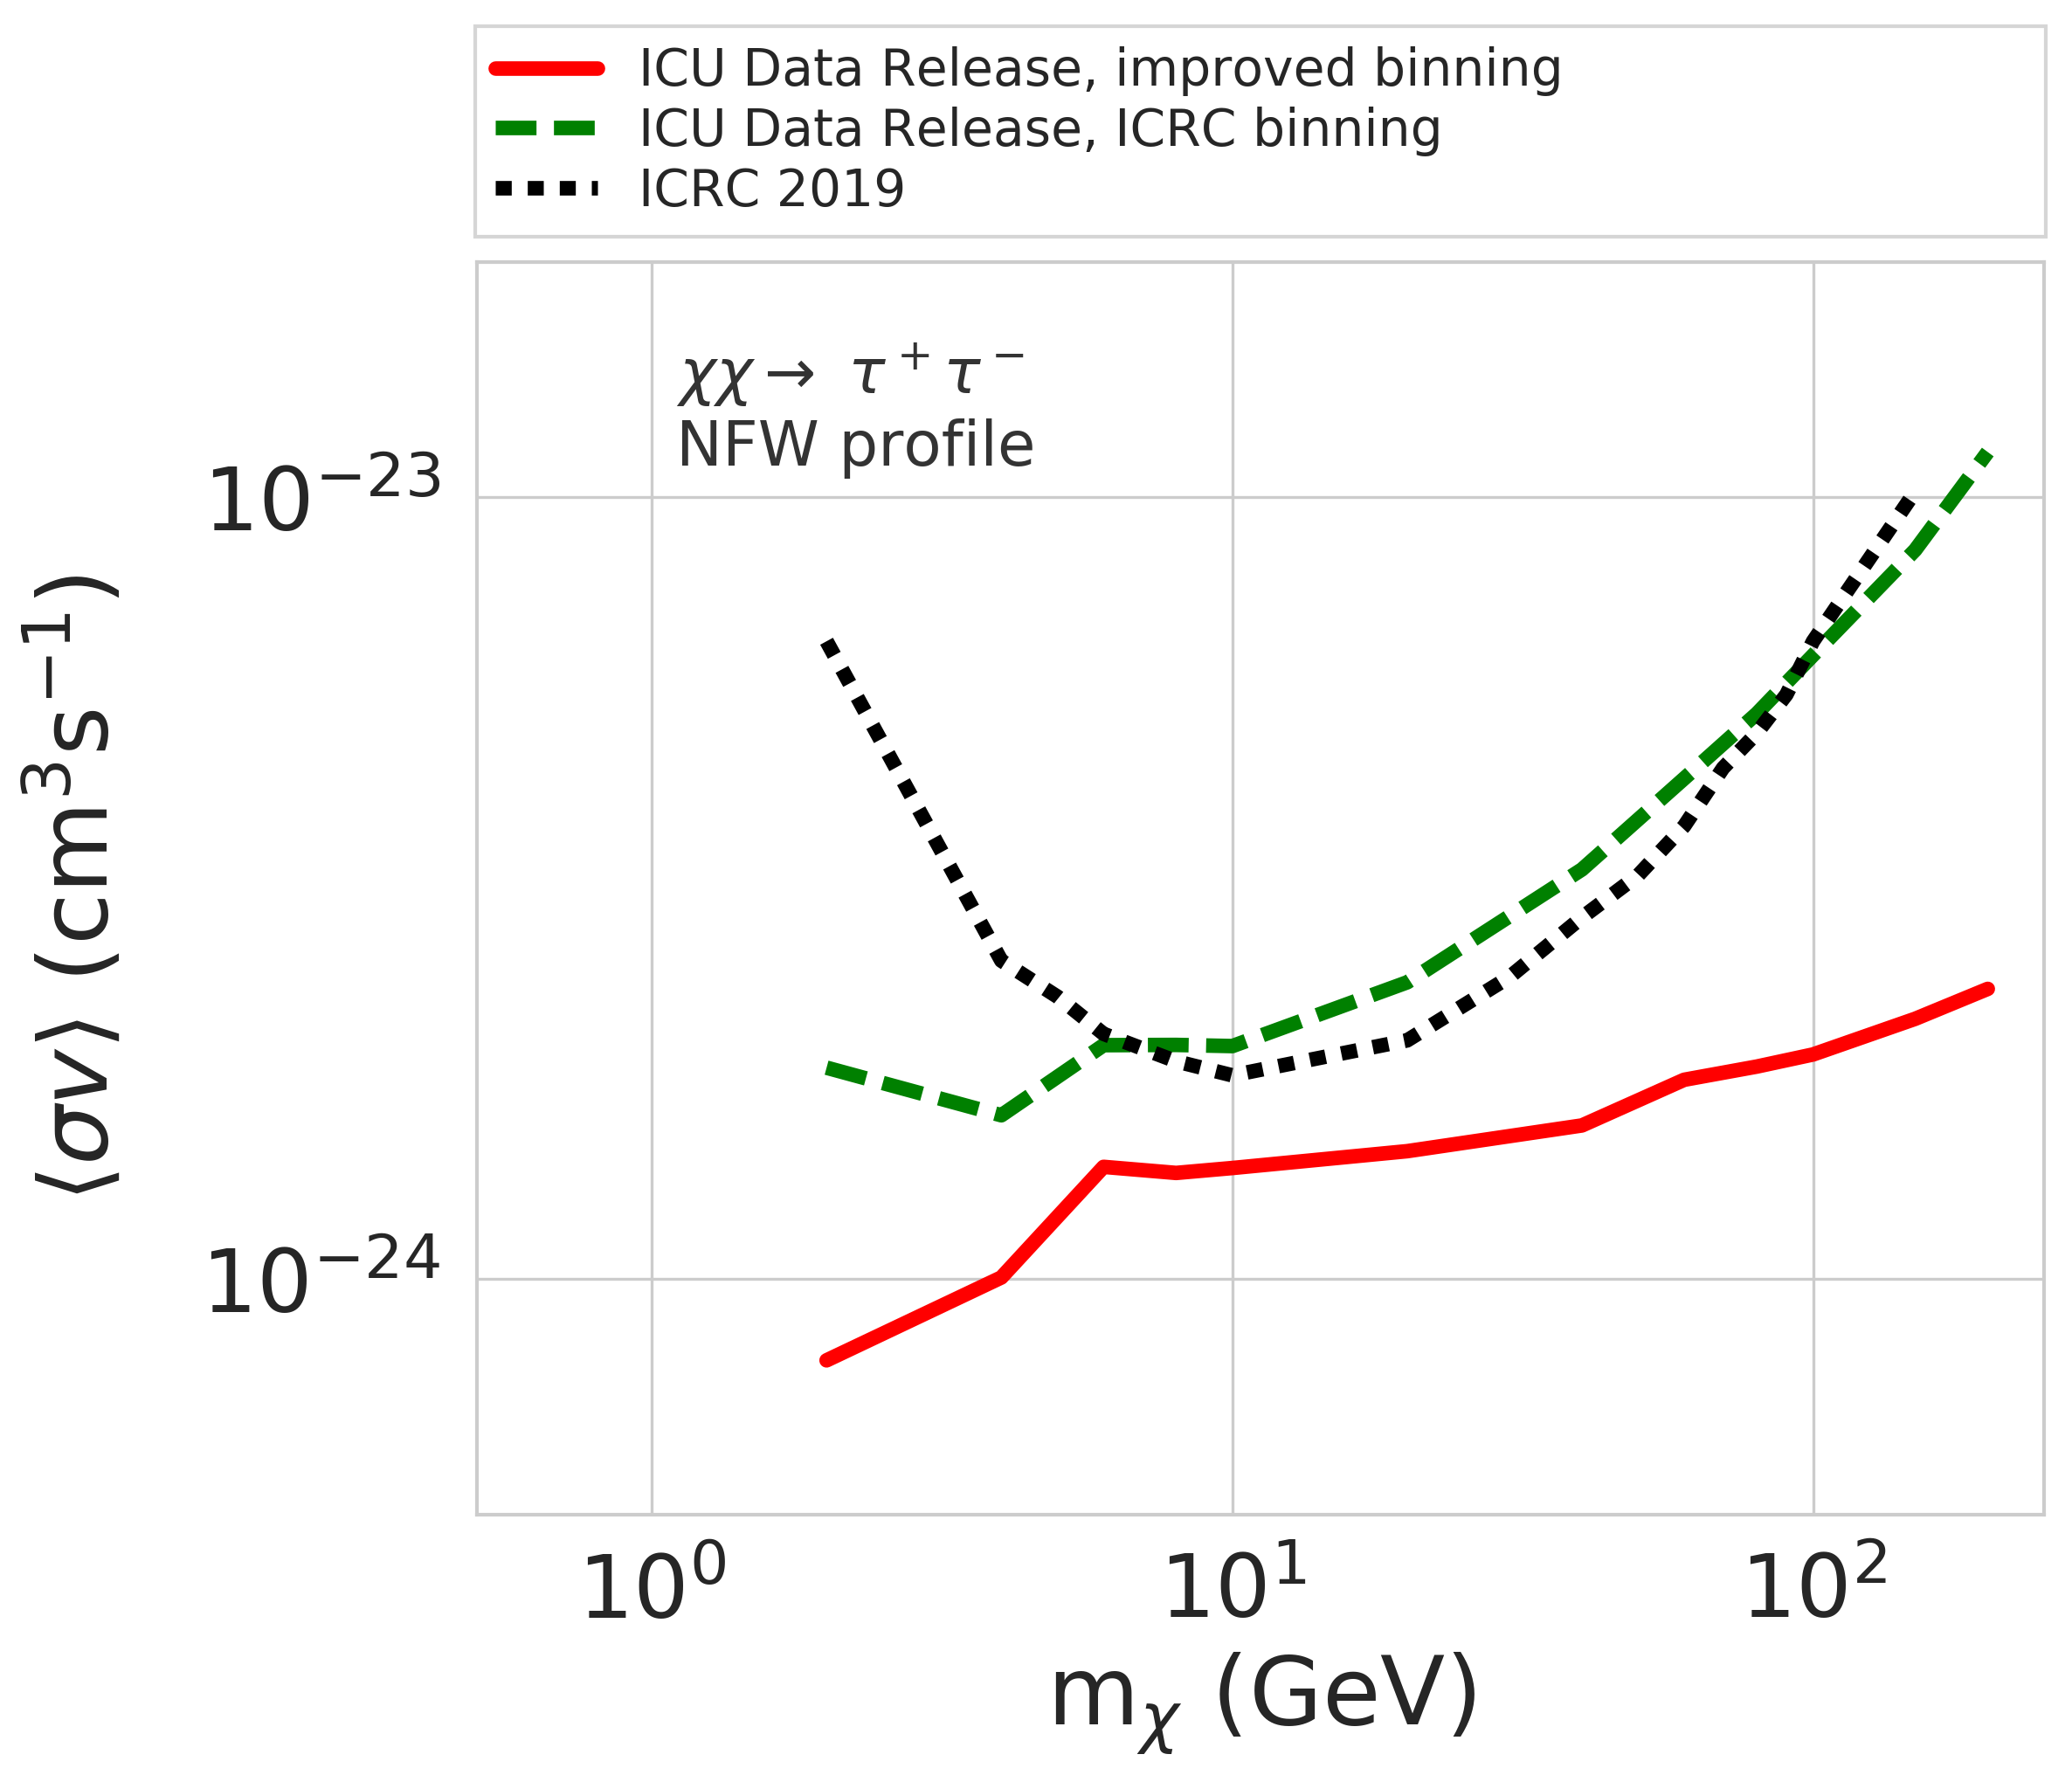

In [24]:
fig,ax = plt.subplots(1,1,figsize=(8,6))

d='ICU'

x,y = getUpgradeSens('tau','NFW','Poisson','Psi-E',(5,2))
ax.plot(x,y, lw=width[d],ls='-',color='r',label=r'ICU Data Release, improved binning')

x,y = getUpgradeSens('tau','NFW','Poisson','RA-DEC',(36,18))
ax.plot(x,y, lw=width[d],ls='--',color='g',label=r'ICU Data Release, ICRC binning')

x,y = getOldUpgradeSens('tau','NFW')
ax.plot(x,y, lw=width[d],ls=':',color='k',label='ICRC 2019')

ax.set_ylabel(r"$\langle\sigma v \rangle$ (cm$^{3}$s$^{-1}$)")
ax.set_xlabel(r"m$_\chi$ (GeV)")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(5e-25,2e-23)
ax.set_xlim(0.5,250)
ax.tick_params(axis='x', pad=10)
ax.tick_params(axis='y', pad=10)
ax.yaxis.labelpad = 20

leg = ax.legend(frameon = 1, fancybox=False, loc='lower left', bbox_to_anchor=(-0.0175, 1., 1.035, 0),labelspacing=0.2, mode="expand")
plt.text(1.1, 1.1e-23,  r'$\chi\chi\rightarrow$ '+latex['tau']+'\n'+'NFW'+' profile',fontsize=17, color = 'k',alpha=0.8)
fig.tight_layout()


In [26]:
def plotResults(channel,profile,detectors):

    fig,ax = plt.subplots(1,1,figsize=(8,6))

    # this work
    x,y = getUpgradeSens(channel,profile,'Poisson','Psi-E',(5,2))
    ax.plot(x,y, lw=4,ls='-',color='r',label=r'IceCube Upgrade (Data Release) 3 year 90% CL')
    
    
    for d in detectors:
        inFile = None
        x = []
        y = []

            
        if d in ['IC86Limits','AntaresLimits','AMS','Voyager1','Fermi','Super-K','Combined']:
            if d == 'IC86Limits':
                d2 = 'IC86'
            elif d == 'AntaresLimits':
                d2 = 'Antares'                
            else: d2=d
            if channel == 'nuMu':
                channel2 = 'nu'
            else:
                channel2 = channel
           
            filename = basepath+'otherLimits/'+d2+'/'+channel2+channel2+'_'+profile+'.csv'
            try:
                inFile = open(filename, 'r')
                data = np.loadtxt(inFile,delimiter=',')
                x = data[:,0]
                y = data[:,1]
            except:
                continue
                    
        x,y = zip(*sorted(zip(x, y)))

        ax.plot(x,y, lw=width[d],dashes=dashes[d],color=color[d],label=label[d])

        
    ax.plot([0.01,10000],[3e-26,3e-26], lw=6,ls='-',color='k',label='',alpha=0.2)
    plt.text(1.1, 1.3e-26,  r'relic density', {'color': 'gray', 'fontsize': 18})
        
    #ax.set_title(r'$\chi\chi\rightarrow$ '+latex[channel]+', NFW profile',fontsize=20,y=1.01)
    ax.set_ylabel(r"$\langle\sigma v \rangle$ (cm$^{3}$m$^{-1}$)")
    ax.set_xlabel(r"m$_\chi$ (GeV)")
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim(5e-27,1e-21)
    if channel == 'b':
        ax.set_ylim(5e-27,1e-19)

    ax.set_xlim(0.7,500)
    ax.tick_params(axis='x', pad=10)
    ax.tick_params(axis='y', pad=10)
    ax.yaxis.labelpad = 20
    
    leg = ax.legend(frameon = 1, fancybox=False, loc='lower left', bbox_to_anchor=(-0.0175, 1., 1.035, 0),labelspacing=0.3, mode="expand")
    #leg = ax.legend(frameon = 1 , loc = 'upper left',bbox_to_anchor=(1,1.03),labelspacing=0.7)
    #leg.set_title(r'$\chi\chi\rightarrow$ '+latex[channel]+', NFW profile',prop={'size':18})
    #leg._legend_box.align = "left"
    
    if channel == 'b':
        plt.text(1.1, 1e-19/5, ICLabel, {'color': 'maroon', 'fontsize': 17.5})
        plt.text(110, 1e-19/5,  r'$\chi\chi\rightarrow$ '+latex[channel]+'\n'+profile+' profile',fontsize=17, color = 'k',alpha=0.8)
    else:
        plt.text(1.1, 1e-21/5, ICLabel, {'color': 'maroon', 'fontsize': 17.5})
        plt.text(110, 1e-21/5,  r'$\chi\chi\rightarrow$ '+latex[channel]+'\n'+profile+' profile',fontsize=17, color = 'k',alpha=0.8)
    fig.tight_layout()
    #fig.savefig('plots/Sensitivity_Comparison_'+channel+'_'+profile+'.pdf') 
    #fig.savefig('plots/Sensitivity_Comparison_'+channel+'_'+profile+'.png') 

/data/user/sbaur/projects/PrepareForGit/Upgrade_DarkMatter/sensitivity/Sensitivity_Poisson_tau_3_NFW_oversampling100_Psi-E_rebin5-2.npy not found
/data/user/sbaur/projects/PrepareForGit/Upgrade_DarkMatter/sensitivity/Sensitivity_Poisson_tau_5_NFW_oversampling100_Psi-E_rebin5-2.npy not found
/data/user/sbaur/projects/PrepareForGit/Upgrade_DarkMatter/sensitivity/Sensitivity_Poisson_tau_7_NFW_oversampling100_Psi-E_rebin5-2.npy not found
/data/user/sbaur/projects/PrepareForGit/Upgrade_DarkMatter/sensitivity/Sensitivity_Poisson_tau_9_NFW_oversampling100_Psi-E_rebin5-2.npy not found
/data/user/sbaur/projects/PrepareForGit/Upgrade_DarkMatter/sensitivity/Sensitivity_Poisson_tau_30_NFW_oversampling100_Psi-E_rebin5-2.npy not found
/data/user/sbaur/projects/PrepareForGit/Upgrade_DarkMatter/sensitivity/Sensitivity_Poisson_tau_50_NFW_oversampling100_Psi-E_rebin5-2.npy not found
/data/user/sbaur/projects/PrepareForGit/Upgrade_DarkMatter/sensitivity/Sensitivity_Poisson_tau_70_NFW_oversampling100_Psi-

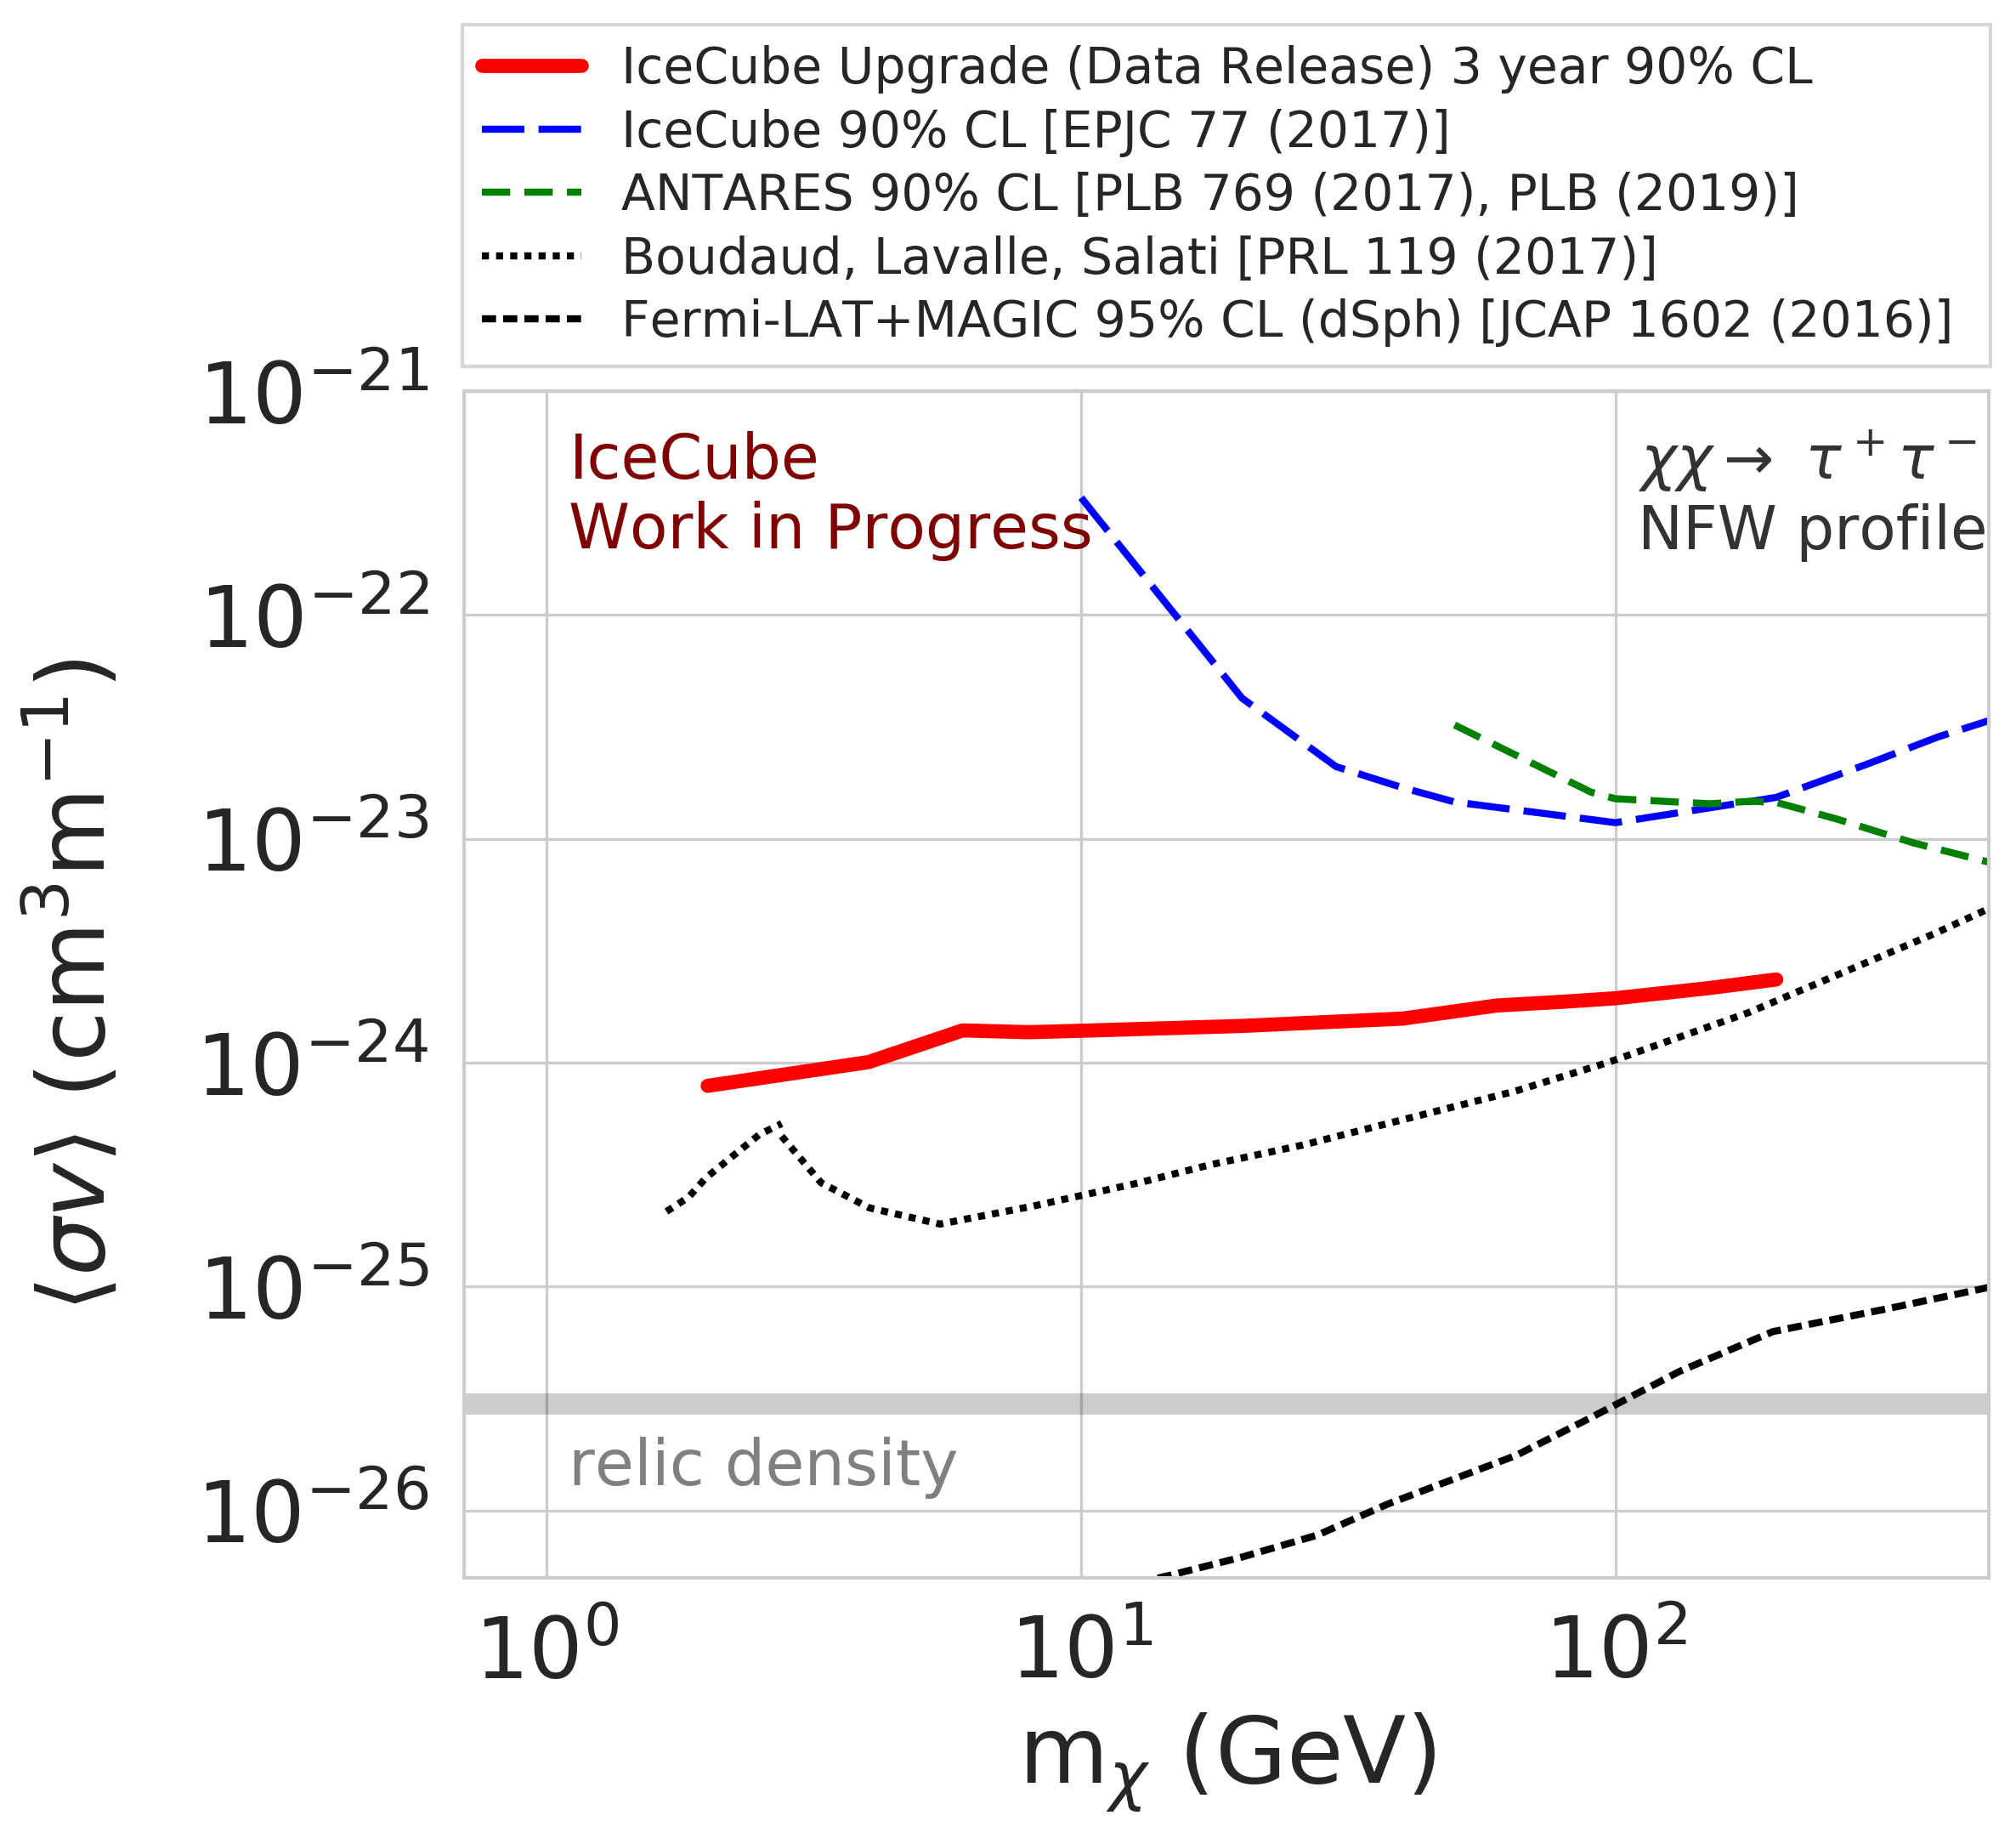

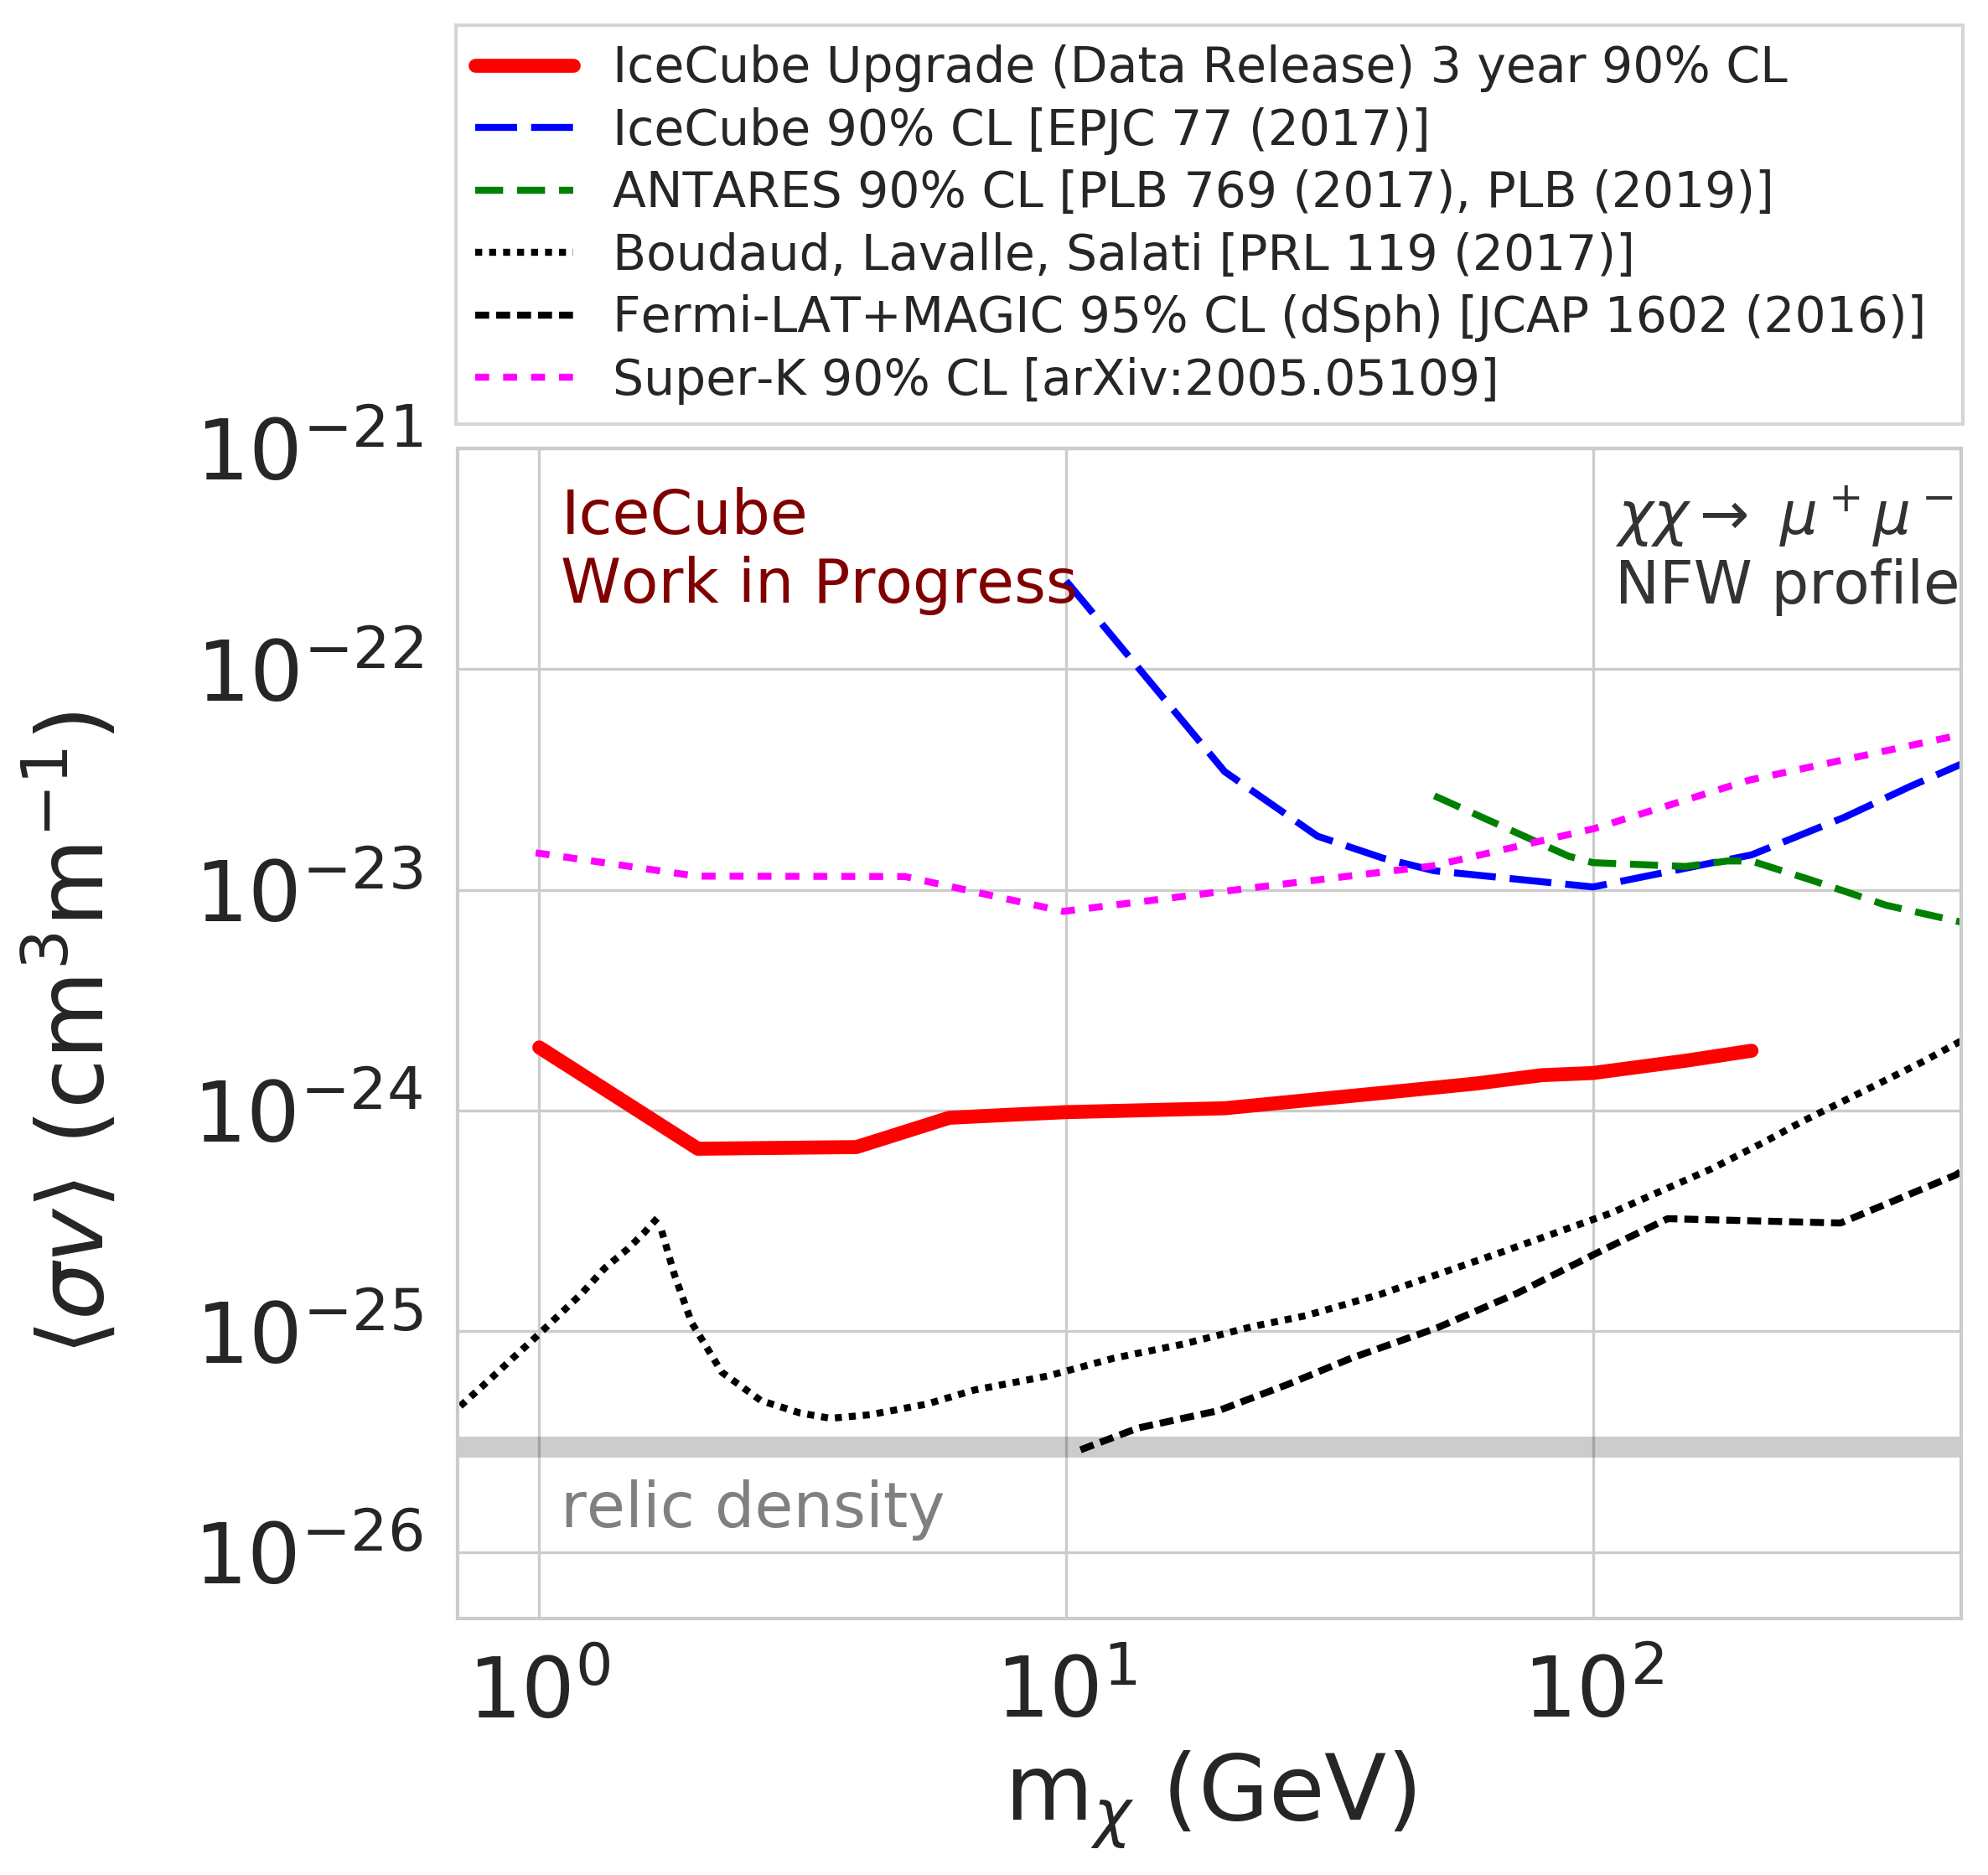

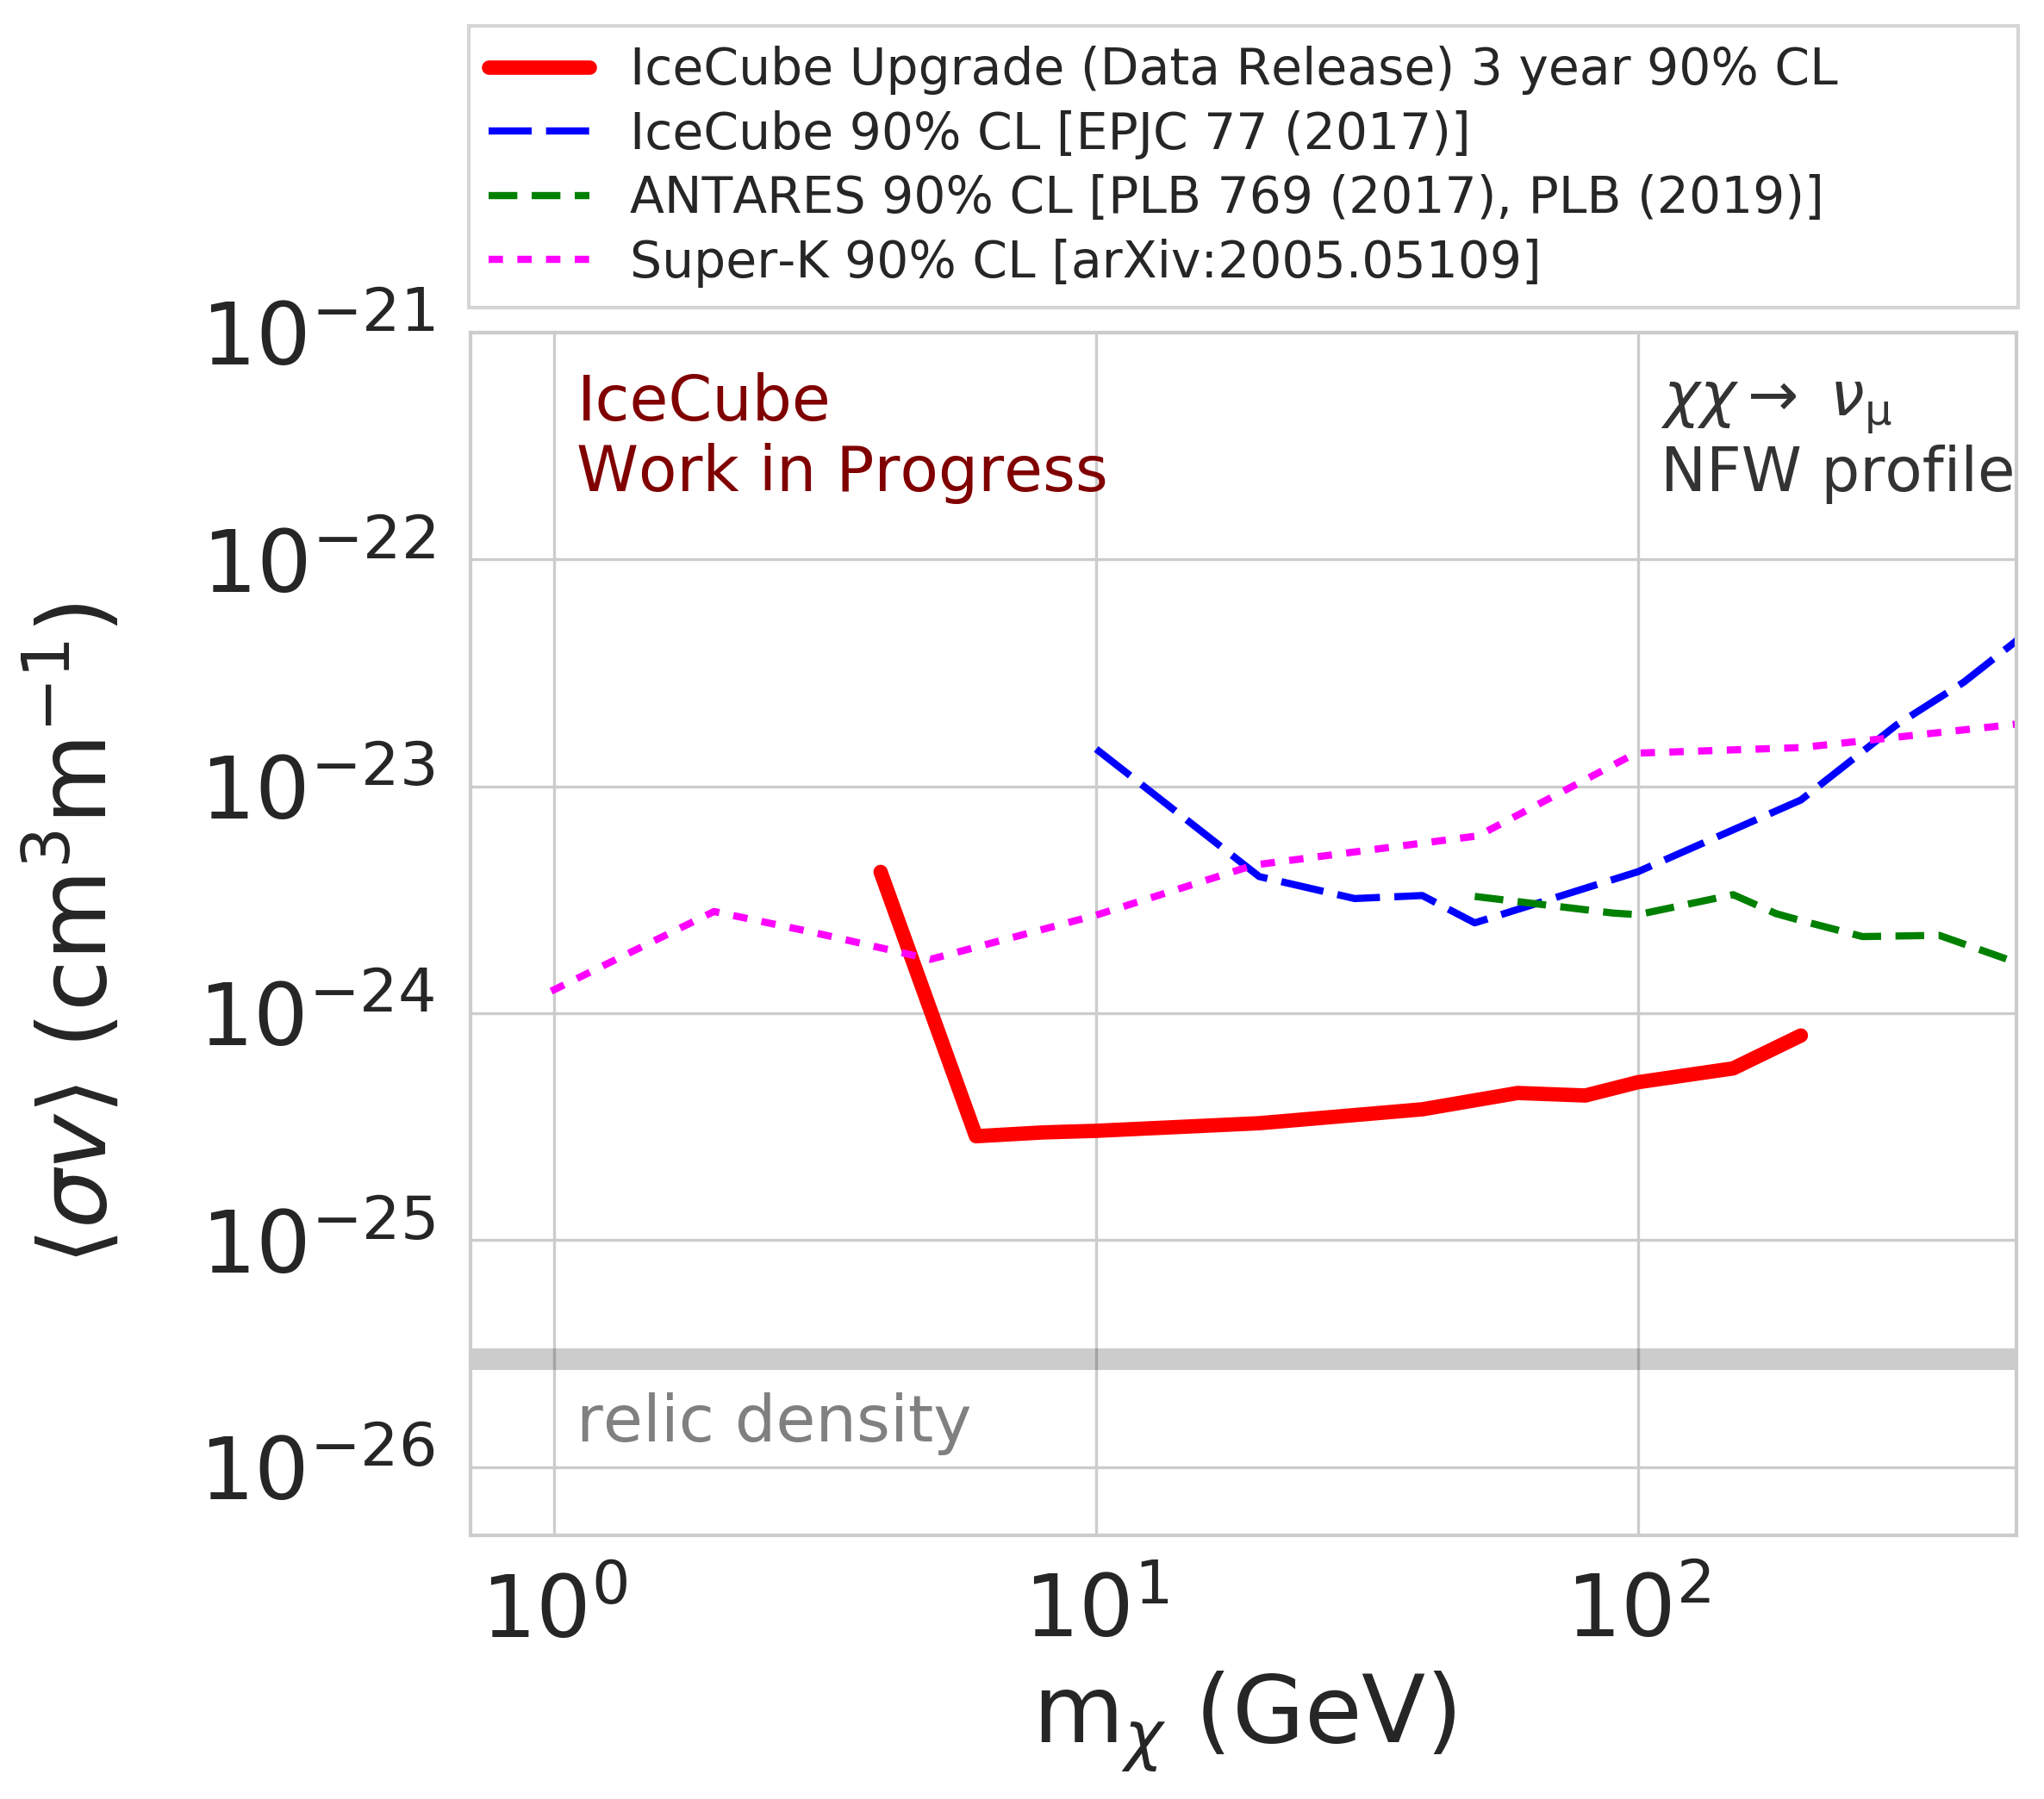

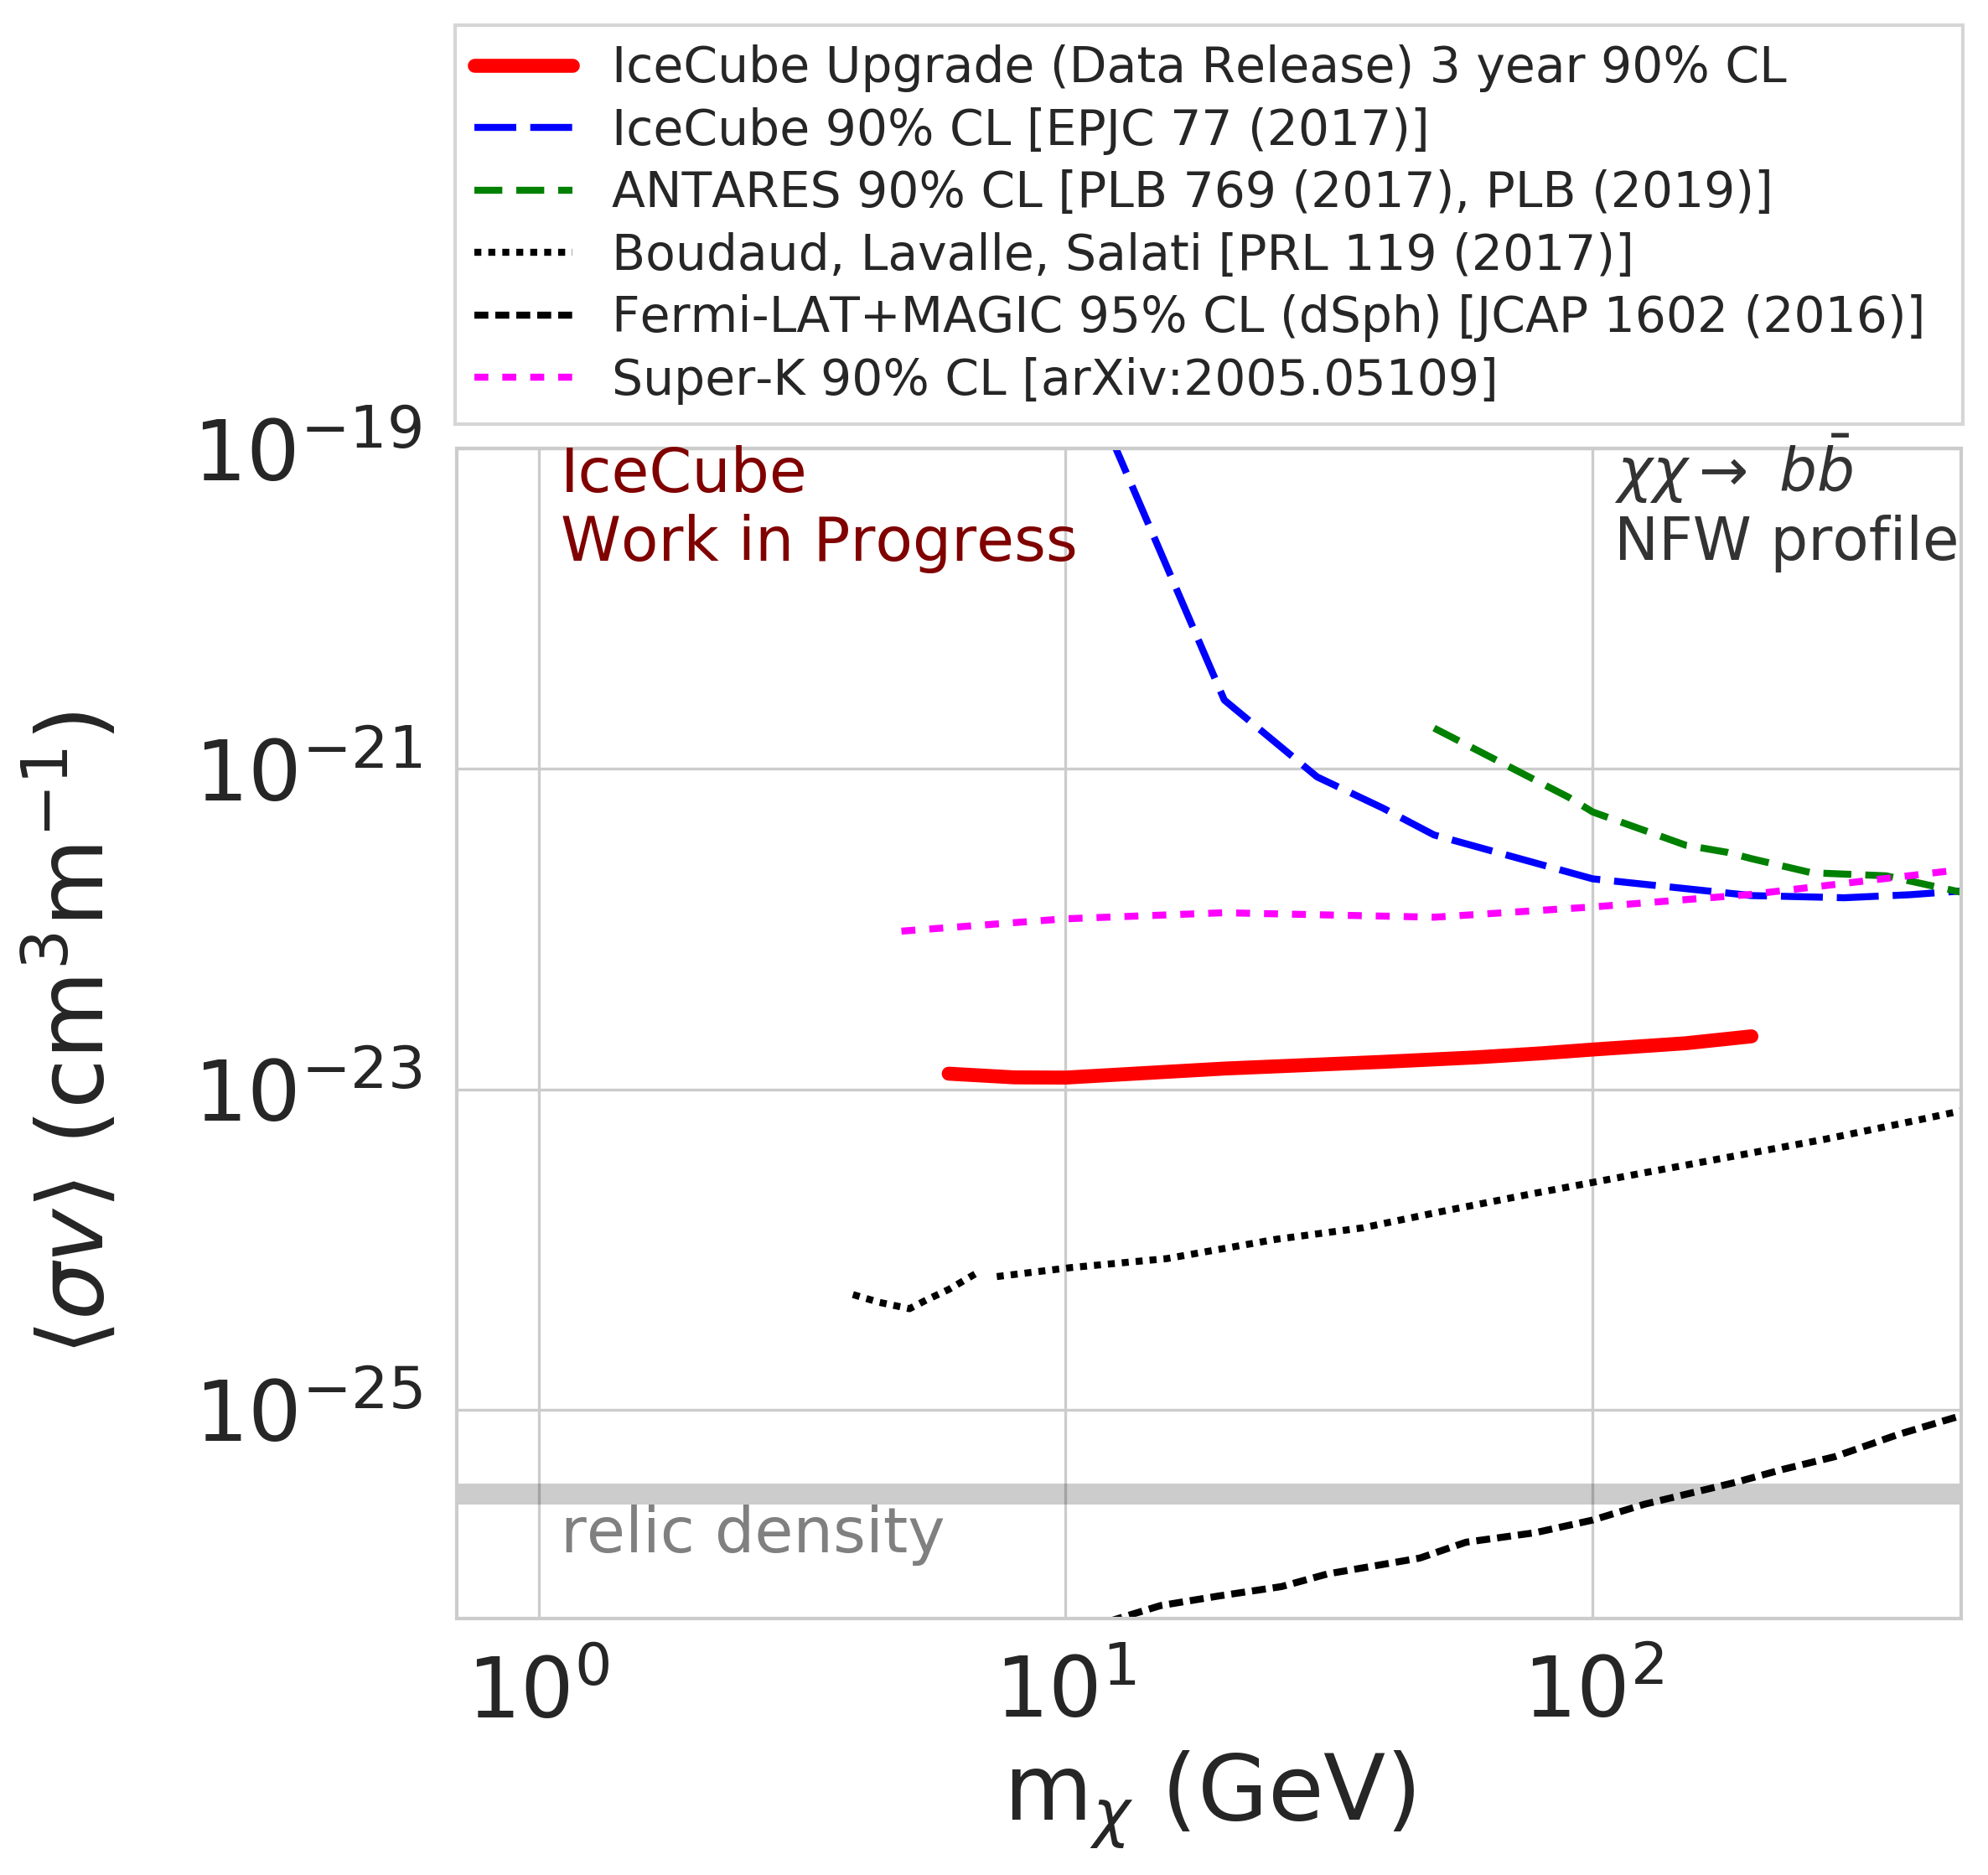

In [27]:
myStyle.increaseLegendText(-2)

plotResults('tau','NFW',['IC86Limits','AntaresLimits','AMS','Voyager1','Fermi','Super-K'])
plotResults('mu','NFW',['IC86Limits','AntaresLimits','AMS','Voyager1','Fermi','Super-K'])
plotResults('nuMu','NFW',['IC86Limits','AntaresLimits','AMS','Voyager1','Fermi','Super-K'])
plotResults('b','NFW',['IC86Limits','AntaresLimits','AMS','Voyager1','Fermi','Super-K'])